In [22]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
#Importing data
#df = pd.read_csv('datasets/milk_prod/monthly-milk-production.csv')
df=pd.read_csv('datasets/milk_prod/monthly-milk-production.csv', index_col=['Month'],
              parse_dates=['Month'])

df.size

168

In [20]:
#Creating train and test set 
split_point=len(df) - 12
train=df[0:split_point]
test=df[split_point:]
train.tail()

,MilkProd
Month,
1974-08-01,867
1974-09-01,815
1974-10-01,812
1974-11-01,773
1974-12-01,813


In [9]:
#plt.figure(figsize=(15, 7))
#plt.plot(df.MilkProd)
#plt.title('Milk Production (yearly data)')
#plt.grid(True)
#plt.show()

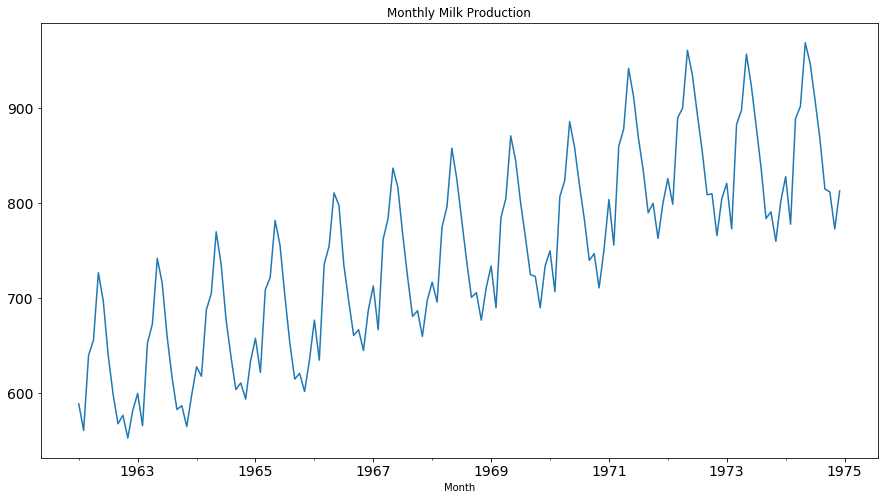

In [5]:
#Visualize training data
train.MilkProd.plot(figsize=(15,8), title= 'Monthly Milk Production', fontsize=14)
#test.MilkProd.plot(figsize=(15,8), title= 'Monthly Milk Production', fontsize=14)
plt.show()

In [115]:
#Baseline - NAIVE APPROACH
#This forecasting technique assumes that the next expected point is equal to the last observed point.
dd= np.asarray(train.MilkProd)
dt=np.asarray(test.MilkProd)
#-----------------------------------------
history = [x for x in dd]
#print(history)
predictions=list()
#rmse function
def h_rmse(prediction, target):
    return sqrt(((prediction - target) ** 2).mean())

for i in range(len(test)): #y_hat = test.copy()
    #predict
    y_hat=history[-1]
    #print(yhat)
    predictions.append(y_hat) #y_hat['naive']
    #print(predictions)
    #observation
    obs=dt[i]
    #print(obs)
    history.append(obs)
    #check=history[-1]
    #print(y_hat, obs)
    #print(history)
    rmse=h_rmse(y_hat,obs)
    print('>Predicted=%.3f, Expected=%3.f, RMSE=%.3f' % (y_hat, obs, rmse))
#-----------------------------------------
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)
#RMSE = (21^2)+(52^2)+...+(46^2)/12 = 2341.5
#RMSE = 2341.5^1/2 i.e. square root of 2341.5 = 48.389

>Predicted=813.000, Expected=834, RMSE=21.000
>Predicted=834.000, Expected=782, RMSE=52.000
>Predicted=782.000, Expected=892, RMSE=110.000
>Predicted=892.000, Expected=903, RMSE=11.000
>Predicted=903.000, Expected=966, RMSE=63.000
>Predicted=966.000, Expected=937, RMSE=29.000
>Predicted=937.000, Expected=896, RMSE=41.000
>Predicted=896.000, Expected=858, RMSE=38.000
>Predicted=858.000, Expected=817, RMSE=41.000
>Predicted=817.000, Expected=827, RMSE=10.000
>Predicted=827.000, Expected=797, RMSE=30.000
>Predicted=797.000, Expected=843, RMSE=46.000
RMSE: 48.389


AttributeError: 'list' object has no attribute 'MilkProd'

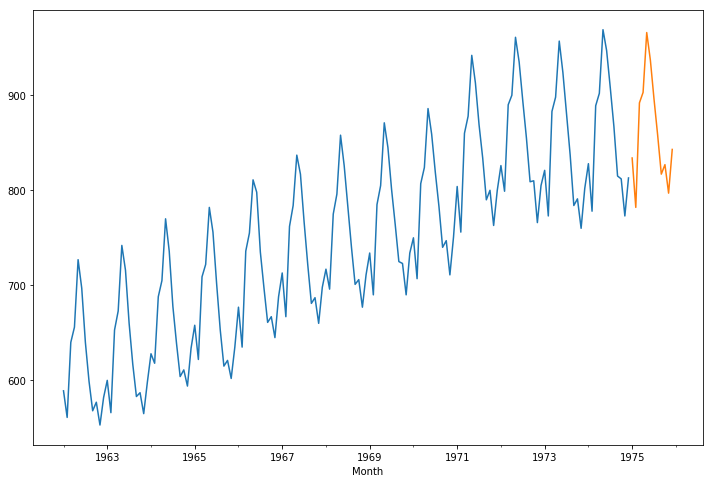

In [117]:
train.MilkProd.plot(figsize=(12,8), label= 'Train')
test.MilkProd.plot(figsize=(12,8), label= 'Test')
predictions.MilkProd.plot(figsize=(12,8), label= 'Naive Forecast')
plt.title("Naive Forecast")
plt.show()

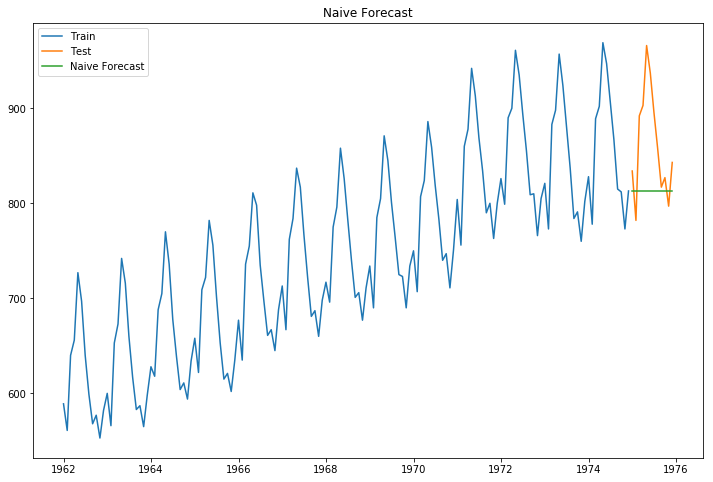

In [118]:
#Baseline - NAIVE APPROACH
#This forecasting technique assumes that the next expected point is equal to the last observed point.
dd= np.asarray(train.MilkProd)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['MilkProd'], label='Train')
plt.plot(test.index,test['MilkProd'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

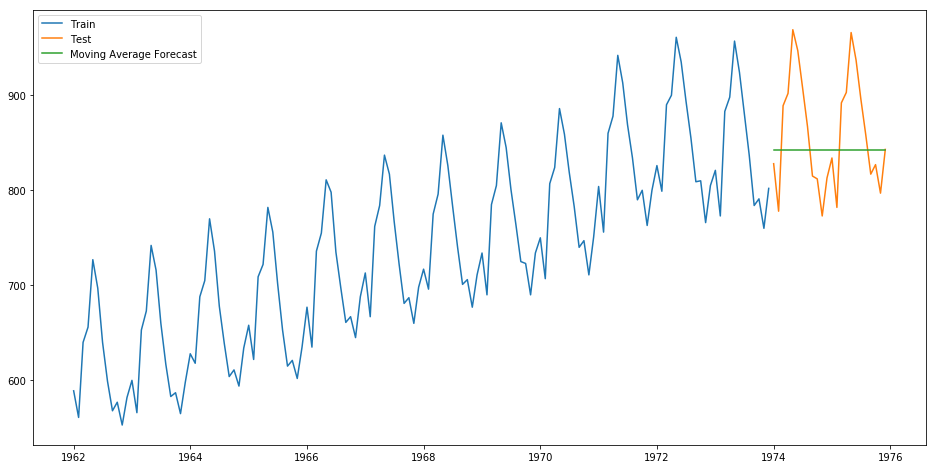

In [374]:
#MOVING AVERAGE
#This forecasting technique uses window of time period for calculating the average.
#Using a simple moving average model, we forecast the next value(s) in a time series based on the average of a fixed finite number ‘p’ of the previous values.
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['MilkProd'].rolling(12).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['MilkProd'], label='Train')
plt.plot(test['MilkProd'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()


In [375]:
rms = sqrt(mean_squared_error(test.MilkProd, y_hat_avg.moving_avg_forecast))
print(rms)

60.99521839182696


In [158]:
from pandas import Series
from numpy import mean
md=np.asarray(train.MilkProd)
#mt=np.asarray(test.MilkProd)
window=3
history=[md[i] for i in range(window)]
test=[md[i] for i in range(window,len(md))]
#print(history)
#print(test)
predictions=list()
#walk forward over time steps in test
for t in range(len(test)):
    length=len(history)
    for i in range((length-window), length):
        yhats=mean(history[i])
        #print(history[i], yhat) 
    #yhat=mean(history[i] for i in range(length-window, length))
    obs=test[t]
    predictions.append(yhats)
    history.append(obs)
    rmse=h_rmse(yhats,obs)
    print('predicted=%f, expected=%f, RMSE=%.3f' % (yhats, obs, rmse))
error = mean_squared_error(test, predictions)
error = sqrt(error)
print('Test RMSE: %.3f' % error)

predicted=640.000000, expected=656.000000, RMSE=16.000
predicted=656.000000, expected=727.000000, RMSE=71.000
predicted=727.000000, expected=697.000000, RMSE=30.000
predicted=697.000000, expected=640.000000, RMSE=57.000
predicted=640.000000, expected=599.000000, RMSE=41.000
predicted=599.000000, expected=568.000000, RMSE=31.000
predicted=568.000000, expected=577.000000, RMSE=9.000
predicted=577.000000, expected=553.000000, RMSE=24.000
predicted=553.000000, expected=582.000000, RMSE=29.000
predicted=582.000000, expected=600.000000, RMSE=18.000
predicted=600.000000, expected=566.000000, RMSE=34.000
predicted=566.000000, expected=653.000000, RMSE=87.000
predicted=653.000000, expected=673.000000, RMSE=20.000
predicted=673.000000, expected=742.000000, RMSE=69.000
predicted=742.000000, expected=716.000000, RMSE=26.000
predicted=716.000000, expected=660.000000, RMSE=56.000
predicted=660.000000, expected=617.000000, RMSE=43.000
predicted=617.000000, expected=583.000000, RMSE=34.000
predicted=5

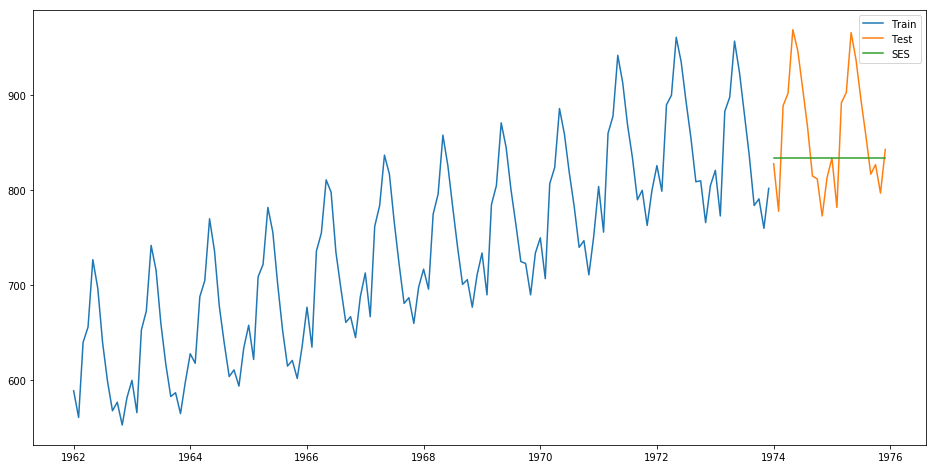

In [376]:
#SIMPLE EXPONENTIAL SMOOTHING
#This technique calculates forecasts using weighted averages where the weights decrease exponentially as observations come from further in the past, the smallest weights are associated with the oldest observations.  
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['MilkProd'])).fit(smoothing_level=0.08,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['MilkProd'], label='Train')
plt.plot(test['MilkProd'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [377]:
rms = sqrt(mean_squared_error(test.MilkProd, y_hat_avg.SES))
print(rms)

64.27618728515527


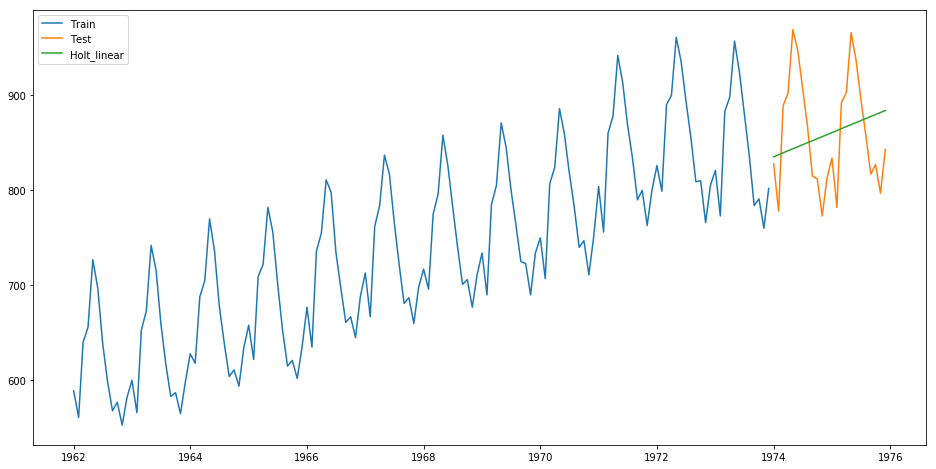

In [378]:
#HOLT'S LINEAR TREND
#This technique takes into account trend and maps the trend without any assumptions.
#Previous techniques can be applied to trend too but Naive approach for example would assume that trend between the last two points is going to stay the same.

y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['MilkProd'])).fit(smoothing_level = 0.012,smoothing_slope = 0.022)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['MilkProd'], label='Train')
plt.plot(test['MilkProd'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [379]:
rms = sqrt(mean_squared_error(test.MilkProd, y_hat_avg.Holt_linear))
print(rms)

61.519399194104864


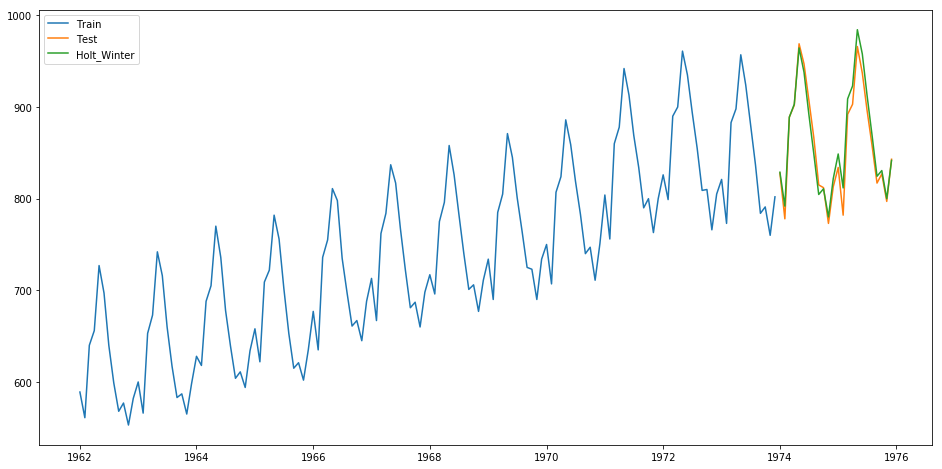

In [380]:
#HOLT-WINTERS
#This method has a seasonality factor.
#It comprises the forecast equation and three smoothing equations — one for the level ℓt, one for trend bt and one for the seasonal component denoted by st, with smoothing parameters α, β and γ.
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['MilkProd']) ,seasonal_periods=12 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['MilkProd'], label='Train')
plt.plot(test['MilkProd'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [381]:
rms = sqrt(mean_squared_error(test.MilkProd, y_hat_avg.Holt_Winter))
print(rms)

13.100248776113771


In [382]:
from pandas import Series
from sklearn.metrics import mean_squared_error
from math import sqrt

#rmse function
def rmse(predictions, targets):
    return sqrt(((predictions - targets) ** 2).mean())

#train.to_csv('train.csv', index=False)
#test.to_csv('test.csv', index=False)
# load data
series = Series.from_csv('datasets/milk_prod/monthly-milk-production.csv')
#series = Series.from_csv('train.csv')
X = series.values
X = X[1:145]
X = X.astype('float32')
#print(X)
#train_size = int(len(X) * 0.80)
train_size = 120
#print(train_size)
train, test = X[0:train_size], X[train_size:]
#print(test)

history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('Predicted=%.3f, Expected=%3.f' % (yhat, obs))
    rmse_metric = rmse(yhat,obs)
    print('RMSE: %.3f' % rmse_metric )

#rms = sqrt(mean_squared_error(test.MilkProd, y_hat.naive))
#print(rms)

# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('Overall RMSE: %.3f' % rmse)

Predicted=800.000, Expected=826
RMSE: 26.000
Predicted=826.000, Expected=799
RMSE: 27.000
Predicted=799.000, Expected=890
RMSE: 91.000
Predicted=890.000, Expected=900
RMSE: 10.000
Predicted=900.000, Expected=961
RMSE: 61.000
Predicted=961.000, Expected=935
RMSE: 26.000
Predicted=935.000, Expected=894
RMSE: 41.000
Predicted=894.000, Expected=855
RMSE: 39.000
Predicted=855.000, Expected=809
RMSE: 46.000
Predicted=809.000, Expected=810
RMSE: 1.000
Predicted=810.000, Expected=766
RMSE: 44.000
Predicted=766.000, Expected=805
RMSE: 39.000
Predicted=805.000, Expected=821
RMSE: 16.000
Predicted=821.000, Expected=773
RMSE: 48.000
Predicted=773.000, Expected=883
RMSE: 110.000
Predicted=883.000, Expected=898
RMSE: 15.000
Predicted=898.000, Expected=957
RMSE: 59.000
Predicted=957.000, Expected=924
RMSE: 33.000
Predicted=924.000, Expected=881
RMSE: 43.000
Predicted=881.000, Expected=837
RMSE: 44.000
Predicted=837.000, Expected=784
RMSE: 53.000
Predicted=784.000, Expected=791
RMSE: 7.000
Predicted=7

C:\Users\MYPC\Anaconda3\lib\site-packages\pandas\core\series.py:3724: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)
